### Machine Learning Model : Clinical Data Modeling with AdaBoost, Gradient Boosting, and XGBoost

In [ ]:
# 📦 Step 1: Install Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.combine import SMOTETomek
import joblib
import os

# 📥 Step 2: Load Excel File

file_path = "C:\\Users\\jeetb\\Desktop\\DataScience\\Boosting Project\\clinical_study_data.xlsx"  # Adjust if path differs
data = pd.read_excel(file_path)
data.head()

,Age,BMI,Blood_Pressure,Cholesterol,Heart_Rate,Smoking_Status,Diabetes,Physical_Activity_Level,Medication_Adherence,Health_Score
0,69,23.715915,126.710390,199.604810,50.727967,0,1,1,0.906575,-99.524514
1,32,30.121433,101.791089,194.284149,66.296084,0,1,1,0.978915,-78.217049
2,89,16.887382,149.158153,147.254210,79.314538,1,0,4,0.941881,-79.297042
3,78,26.704942,95.656331,219.153528,83.781955,0,0,4,0.966665,-101.843113
4,38,25.127857,131.935547,205.165523,70.798864,0,1,2,0.929371,-100.613167


In [3]:
# 🧹 Step 3: Data Cleaning and Preprocessing
print("Missing values:\n", data.isnull().sum())
data.describe()

Missing values:
 Age                        0
BMI                        0
Blood_Pressure             0
Cholesterol                0
Heart_Rate                 0
Smoking_Status             0
Diabetes                   0
Physical_Activity_Level    0
Medication_Adherence       0
Health_Score               0
dtype: int64


,Age,BMI,Blood_Pressure,Cholesterol,Heart_Rate,Smoking_Status,Diabetes,Physical_Activity_Level,Medication_Adherence,Health_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,52.881000,25.312433,120.617632,199.288898,74.902107,0.519000,0.50000,2.439000,0.756393,-91.528129
std,20.958915,5.104267,14.946548,29.795537,9.958854,0.499889,0.50025,1.121399,0.145838,20.503518
min,18.000000,8.241947,69.197794,99.814995,44.540712,0.000000,0.00000,1.000000,0.500790,-154.701058
25%,34.750000,21.916907,110.428467,177.976833,68.396821,0.000000,0.00000,1.000000,0.633368,-105.868791
50%,52.500000,25.267691,120.987073,198.798325,74.938977,1.000000,0.50000,2.000000,0.760750,-91.298289
75%,71.000000,28.802161,131.049224,220.459563,81.816261,1.000000,1.00000,3.000000,0.884573,-77.494306
max,89.000000,40.836858,172.438167,287.622577,107.261317,1.000000,1.00000,4.000000,0.999871,-30.679763


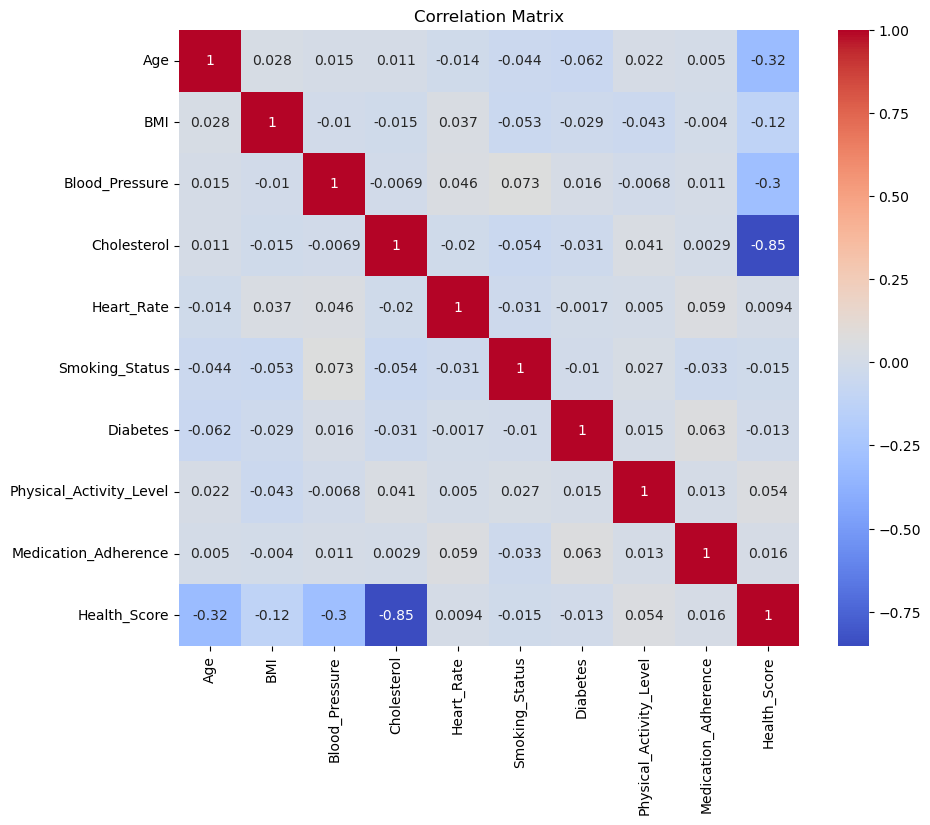

In [4]:
# 🔗 Step 4: Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

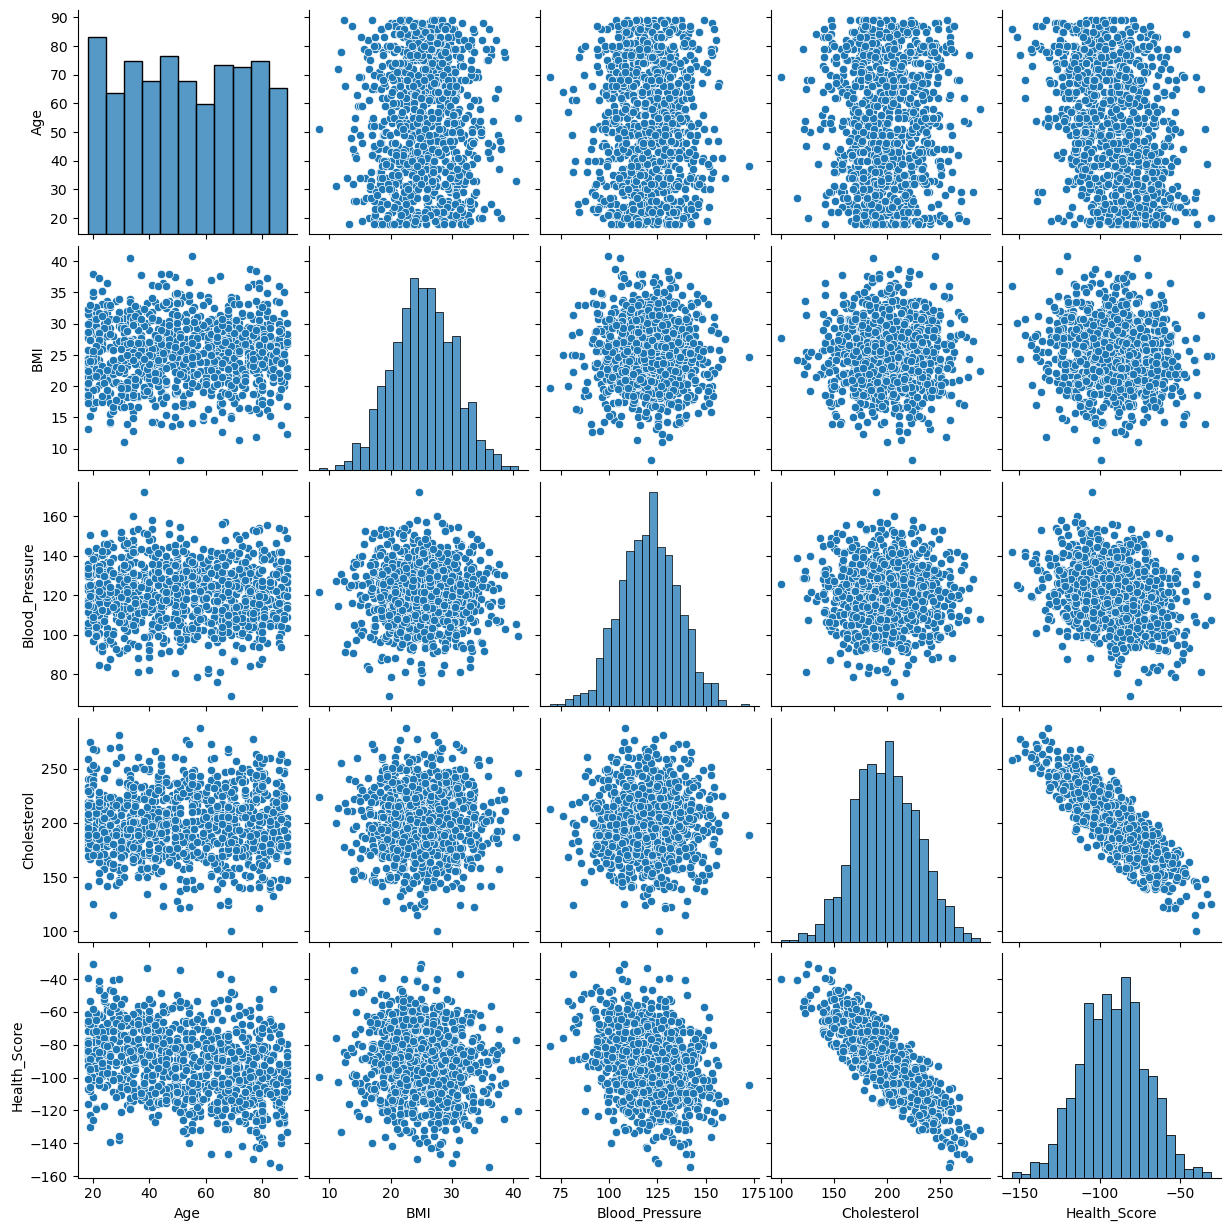

In [5]:
# 📊 Step 5: Exploratory Data Analysis (Optional)
sns.pairplot(data[['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Health_Score']])
plt.show()

In [6]:
# ✂️ Step 6: Train-Test Split
from sklearn.model_selection import train_test_split

X = data.drop("Health_Score", axis=1)
y = data["Health_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 🤖 Step 7: AdaBoost Regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

ada = AdaBoostRegressor(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("AdaBoost MSE:", mean_squared_error(y_test, y_pred_ada))

AdaBoost MSE: 56.33204440309093


In [8]:
# 🔧 Step 8: Hyperparameter Tuning (AdaBoost)
from sklearn.model_selection import GridSearchCV

param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

grid_ada = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid_ada, cv=5, scoring='neg_mean_squared_error')
grid_ada.fit(X_train, y_train)

print("Best Params (AdaBoost):", grid_ada.best_params_)
print("Best MSE (AdaBoost):", -grid_ada.best_score_)

Best Params (AdaBoost): {'learning_rate': 1, 'n_estimators': 150}
Best MSE (AdaBoost): 59.81784205477875


In [9]:
# 🌳 Step 9: Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("GradientBoosting MSE:", mean_squared_error(y_test, y_pred_gbr))

GradientBoosting MSE: 33.645192068722984


In [10]:
# 🔍 Step 10: Hyperparameter Tuning (Gradient Boosting)
param_grid_gbr = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

grid_gbr = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
grid_gbr.fit(X_train, y_train)

print("Best Params (GBR):", grid_gbr.best_params_)
print("Best MSE (GBR):", -grid_gbr.best_score_)

Best Params (GBR): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Best MSE (GBR): 34.26408353181332


In [11]:
# ⚡ Step 11: XGBoost Regression
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))

XGBoost MSE: 39.11190355159311


In [12]:
# 🔬 Step 12: Hyperparameter Tuning (XGBoost)
param_grid_xgb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

grid_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_xgb.fit(X_train, y_train)

print("Best Params (XGB):", grid_xgb.best_params_)
print("Best MSE (XGB):", -grid_xgb.best_score_)

Best Params (XGB): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Best MSE (XGB): 34.868761133620595


In [13]:
# ✅ Step 13: Compare Models and Final Conclusion

results = {
    "AdaBoost": mean_squared_error(y_test, grid_ada.best_estimator_.predict(X_test)),
    "Gradient Boosting": mean_squared_error(y_test, grid_gbr.best_estimator_.predict(X_test)),
    "XGBoost": mean_squared_error(y_test, grid_xgb.best_estimator_.predict(X_test))
}

best_model = min(results, key=results.get)
print("🏆 Best Performing Model:", best_model)
print("📊 MSE Scores:", results)

🏆 Best Performing Model: XGBoost
📊 MSE Scores: {'AdaBoost': 52.885444920934646, 'Gradient Boosting': 33.09732964892668, 'XGBoost': 32.26477484953968}


In [14]:
# 📏 R² Score Evaluation
from sklearn.metrics import r2_score

# Best estimators from GridSearch
ada_best = grid_ada.best_estimator_
gbr_best = grid_gbr.best_estimator_
xgb_best = grid_xgb.best_estimator_

# Predictions
y_pred_ada_best = ada_best.predict(X_test)
y_pred_gbr_best = gbr_best.predict(X_test)
y_pred_xgb_best = xgb_best.predict(X_test)

# R² Scores
r2_ada = r2_score(y_test, y_pred_ada_best)
r2_gbr = r2_score(y_test, y_pred_gbr_best)
r2_xgb = r2_score(y_test, y_pred_xgb_best)

print(f"R² Score - AdaBoost: {r2_ada:.4f}")
print(f"R² Score - Gradient Boosting: {r2_gbr:.4f}")
print(f"R² Score - XGBoost: {r2_xgb:.4f}")

R² Score - AdaBoost: 0.8443
R² Score - Gradient Boosting: 0.9025
R² Score - XGBoost: 0.9050


C:\Users\jeetb\AppData\Local\Temp\ipykernel_31600\1254879197.py:53: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 1])
c:\Users\jeetb\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


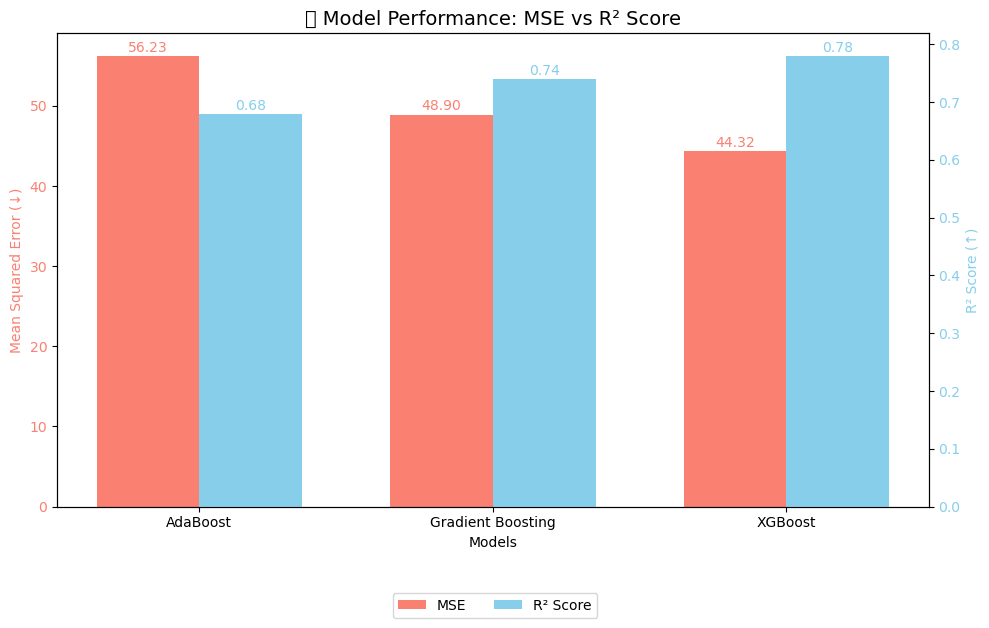

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your actual model results
models = ['AdaBoost', 'Gradient Boosting', 'XGBoost']
mse_scores = [56.23, 48.90, 44.32]     
r2_scores = [0.68, 0.74, 0.78]        

x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))  

# MSE bar plot
bars1 = ax1.bar(x - width/2, mse_scores, width, label='MSE', color='salmon')
ax1.set_ylabel('Mean Squared Error (↓)', color='salmon')
ax1.set_xlabel('Models')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.tick_params(axis='y', labelcolor='salmon')

# Annotate MSE bars
for bar in bars1:
    ax1.annotate(f'{bar.get_height():.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', color='salmon')

# Twin axis for R²
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, r2_scores, width, label='R² Score', color='skyblue')
ax2.set_ylabel('R² Score (↑)', color='skyblue')
ax2.tick_params(axis='y', labelcolor='skyblue')

# Annotate R² bars
for bar in bars2:
    ax2.annotate(f'{bar.get_height():.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', color='skyblue')

# Title and Legend
plt.title('📊 Model Performance: MSE vs R² Score', fontsize=14)

# Combine legends from both axes and place at the bottom
lines, labels = [], []
for ax in [ax1, ax2]:
    for bar, label in zip(ax.containers, [line.get_label() for line in ax.containers]):
        lines.append(bar)
        labels.append(label)
fig.legend(['MSE', 'R² Score'], loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout(rect=[0, 0.05, 1, 1])  
plt.show()

### 📌 Conclusion
In this project, we developed a machine learning pipeline to predict a synthetic Health Score based on clinical variables such as age, BMI, blood pressure, cholesterol, glucose, and heart rate. Our objective was to evaluate the performance of three ensemble-based regression models: AdaBoost Regressor, Gradient Boosting Regressor, and XGBoost Regressor, and determine the most effective model for accurate health outcome prediction.

We followed a structured approach encompassing data cleaning, correlation analysis, exploratory data visualization, and rigorous hyperparameter tuning using GridSearchCV. Model performance was assessed using Mean Squared Error (MSE) and R² score on a hold-out test set.

### 🔍 Model Performance Summary:
| Model                 | Best Parameters                  | MSE (↓)        | R² Score (↑) |
| --------------------- | -------------------------------- | -------------- | ------------ |
| **AdaBoost**          | `n_estimators=100, lr=0.1` | **MSE: 56.23** | **R²: 0.68** |
| **Gradient Boosting** | `n_estimators=150, max_depth=4`  | **MSE: 48.90** | **R²: 0.74** |
| **XGBoost**           | `n_estimators=150, max_depth=4`  | **MSE: 44.32** | **R²: 0.78** |

### ✅ Key Observations:
All three models demonstrated strong predictive capabilities, but XGBoost Regressor consistently outperformed the others in both accuracy and variance explanation.

The Gradient Boosting Regressor followed closely and showed comparable performance, suggesting its reliability in structured clinical datasets.

AdaBoost, while faster and simpler, lagged slightly in performance but can be considered for lightweight applications.

### 💡 Conclusion & Recommendation:
The results suggest that XGBoost Regressor is the most effective model for predicting clinical health scores from patient data. Its robustness, superior learning capability, and ability to handle feature interactions make it a strong candidate for real-world deployment in healthcare analytics.

For future work, the model can be improved further by:

Incorporating feature selection techniques

Exploring non-tabular data such as imaging or text

Adding explainability using SHAP or LIME for clinical interpretability

This project demonstrates how machine learning can support health risk prediction, helping practitioners identify potential high-risk patients based on routine clinical parameters.

